Roll: 2019121004 <br>
Avani Gupta

In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

from sklearn import preprocessing
from sklearn import utils
import matplotlib.pyplot as plt

## Pre-processing

In [2]:
df = pd.read_csv('Indian Earthquakes List Update_Magnitudes.csv',encoding= 'unicode_escape')

/home/avani.gupta/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (2,6,7,9,10,11,12,13,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
units = df.iloc[0]
units

Sl. No.          NaN
YEAR             NaN
MONTH            NaN
DATE             NaN
ORIGIN TIME    (UTC)
Unnamed: 5     (IST)
MAGNITUDE        Mw 
Unnamed: 7        Mw
Unnamed: 8        Mb
Unnamed: 9        Mb
Unnamed: 10       Ms
Unnamed: 11       ML
LAT (N)          NaN
LONG (E)         NaN
DEPTH (km)       NaN
INTENSITY         MM
Unnamed: 16      MMI
Unnamed: 17      MME
LOCATION         NaN
REFERENCE        NaN
Name: 0, dtype: object

In [4]:
df = df.drop(0)
df

,Sl. No.,YEAR,MONTH,DATE,ORIGIN TIME,Unnamed: 5,MAGNITUDE,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,LAT (N),LONG (E),DEPTH (km),INTENSITY,Unnamed: 16,Unnamed: 17,LOCATION,REFERENCE
1,1.0,-2474.0,0,0.0,NaN,NaN,7.5,7.5,NaN,6.969202899,7.260619977,7.427072403,71.0,24.0,0.0,NaN,NaN,NaN,NaN,Dr STGR
2,2.0,-325.0,0,0.0,NaN,NaN,7.5,7.5,NaN,6.969202899,7.260619977,7.427072403,71.0,24.0,0.0,NaN,NaN,NaN,NaN,Dr STGR
3,3.0,25.0,0,0.0,NaN,NaN,7.5,7.5,NaN,6.969202899,7.260619977,7.427072403,72.9,33.72,0.0,NaN,NaN,NaN,NaN,Dr STGR
4,4.0,26.0,5,10.0,08.19.10.0,NaN,6.1397,6.1397,5.737047101,5.737047101,5.698851894,5.999685205,17.3,80.1,NaN,NaN,NaN,NaN,NaN,NEIC
5,5.0,26.0,5,10.0,08.19.10.0,NaN,6.1397,6.1397,5.737047101,5.737047101,6.075520196,5.999685205,26.0,97.0,80.0,NaN,NaN,NaN,Myanmar,G-R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52985,52970.0,2019.0,7.0,28.0,19:24:08,00:54:08/2019-07-29/,3.2,3.2,NaN,3.074275,2.323766,2.915005,32.8ï¿½N,78.4ï¿½E,10.0,NaN,NaN,NaN,Jammu & Kashmir,NaN
52986,52971.0,2019.0,7.0,28.0,10:44:10,16:14:10,3.6,3.6,NaN,3.436594,2.783008,3.334732,25.5ï¿½N,90.4ï¿½E,70.0,NaN,NaN,NaN,"Distt. East Garo Hills ,Meghalaya",NaN
52987,52972.0,2019.0,7.0,28.0,21:25:06,7/29/2019 2:55,4.0,4.0,NaN,3.798913,3.24225,3.75446,23.2ï¿½N,86.5ï¿½E,22.0,NaN,NaN,NaN,"Distt. Puruliya, West Bengal",NaN
52988,52973.0,2019.0,7.0,29.0,3:33:53,9:03:53,4.3,4.3,NaN,4.070652,3.586682,4.069255,32.8ï¿½N,76.4ï¿½E,20.0,NaN,NaN,NaN,"Distt. Lahaul-Spiti,Himachal Pradesh",NaN


In [5]:
df.dtypes

Sl. No.        float64
YEAR           float64
MONTH           object
DATE           float64
ORIGIN TIME     object
Unnamed: 5      object
MAGNITUDE       object
Unnamed: 7      object
Unnamed: 8      object
Unnamed: 9      object
Unnamed: 10     object
Unnamed: 11     object
LAT (N)         object
LONG (E)        object
DEPTH (km)     float64
INTENSITY       object
Unnamed: 16     object
Unnamed: 17     object
LOCATION        object
REFERENCE       object
dtype: object

In [6]:
df_num = df.select_dtypes(include=[np.float])
non_num = df.select_dtypes(exclude=[np.number])

In [7]:
for col in df.columns:
    num_of_nan = df[col].isnull().sum()
    print("col {} len {} NaNs {}".format(col,len(df[col]),num_of_nan))
    if num_of_nan == len(df[col])-1: #column has all NaN
        df = df.drop([col],axis=1)
        print("dropping col:",col)

col Sl. No. len 52989 NaNs 0
col YEAR  len 52989 NaNs 0
col MONTH  len 52989 NaNs 18
col DATE len 52989 NaNs 57
col ORIGIN TIME len 52989 NaNs 31803
col Unnamed: 5 len 52989 NaNs 52563
col MAGNITUDE len 52989 NaNs 12054
col Unnamed: 7 len 52989 NaNs 2504
col Unnamed: 8 len 52989 NaNs 40706
col Unnamed: 9 len 52989 NaNs 2492
col Unnamed: 10 len 52989 NaNs 166
col Unnamed: 11 len 52989 NaNs 166
col LAT (N) len 52989 NaNs 0
col LONG (E) len 52989 NaNs 0
col DEPTH (km) len 52989 NaNs 2178
col INTENSITY len 52989 NaNs 52948
col Unnamed: 16 len 52989 NaNs 52989
col Unnamed: 17 len 52989 NaNs 52989
col LOCATION len 52989 NaNs 43615
col REFERENCE len 52989 NaNs 1582


intensity has too many NaN, same with Unnamed: 16,Unnamed: 17

In [8]:
cols = ['YEAR ', 'MONTH ', 'DATE',
       'MAGNITUDE', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'DEPTH (km)' ]
cols_non_num = ['MONTH ', 
       'MAGNITUDE', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11' ]
def con(st):
    if not isinstance(st, str): #replace NaN with 0
        return ''
    else:
        
        try:
            return float(st)
        except:
            print(st)
            return '' #non-numeric val
    

for col in cols_non_num:
    try:
        df[col] = df[col].apply(lambda x: con(x))
    except:
        print("error converting col",col)

df[cols] = df[cols].apply(pd.to_numeric)
# df['Unnamed: 7']= df['Unnamed: 7'].apply(pd.to_numeric)

 
 
#VALUE!
#VALUE!
#VALUE!
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
4F
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
.F
..
..
..
.F
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
4F
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
.F
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
.F
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
.F
.F
..
..
..
..
..
..
..
..
..
..
..


In [9]:
df_new = df[cols]
df_new

,YEAR,MONTH,DATE,MAGNITUDE,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,DEPTH (km)
1,-2474.0,0.0,0.0,7.5000,7.5000,NaN,6.969203,7.260620,7.427072,0.0
2,-325.0,0.0,0.0,7.5000,7.5000,NaN,6.969203,7.260620,7.427072,0.0
3,25.0,0.0,0.0,7.5000,7.5000,NaN,6.969203,7.260620,7.427072,0.0
4,26.0,5.0,10.0,6.1397,6.1397,5.737047,5.737047,5.698852,5.999685,NaN
5,26.0,5.0,10.0,6.1397,6.1397,5.737047,5.737047,6.075520,5.999685,80.0
...,...,...,...,...,...,...,...,...,...,...
52985,2019.0,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0
52986,2019.0,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0
52987,2019.0,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,22.0
52988,2019.0,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0


In [10]:
df_new = df_new.fillna(method='ffill')

In [11]:
df_new = df_new.fillna(0)

In [12]:
df_new

,YEAR,MONTH,DATE,MAGNITUDE,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,DEPTH (km)
1,-2474.0,0.0,0.0,7.5000,7.5000,0.000000,6.969203,7.260620,7.427072,0.0
2,-325.0,0.0,0.0,7.5000,7.5000,0.000000,6.969203,7.260620,7.427072,0.0
3,25.0,0.0,0.0,7.5000,7.5000,0.000000,6.969203,7.260620,7.427072,0.0
4,26.0,5.0,10.0,6.1397,6.1397,5.737047,5.737047,5.698852,5.999685,0.0
5,26.0,5.0,10.0,6.1397,6.1397,5.737047,5.737047,6.075520,5.999685,80.0
...,...,...,...,...,...,...,...,...,...,...
52985,2019.0,1.0,28.0,4.0000,4.0000,5.100000,3.798913,3.242250,3.754460,10.0
52986,2019.0,1.0,28.0,4.0000,4.0000,5.100000,3.798913,3.242250,3.754460,70.0
52987,2019.0,1.0,28.0,4.0000,4.0000,5.100000,3.798913,3.242250,3.754460,22.0
52988,2019.0,1.0,29.0,4.0000,4.0000,5.100000,3.798913,3.242250,3.754460,20.0


In [13]:
df_new.to_csv("pre.csv")

In [14]:
df_new.columns

Index(['YEAR ', 'MONTH ', 'DATE', 'MAGNITUDE', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'DEPTH (km)'],
      dtype='object')

In [15]:
df_new

,YEAR,MONTH,DATE,MAGNITUDE,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,DEPTH (km)
1,-2474.0,0.0,0.0,7.5000,7.5000,0.000000,6.969203,7.260620,7.427072,0.0
2,-325.0,0.0,0.0,7.5000,7.5000,0.000000,6.969203,7.260620,7.427072,0.0
3,25.0,0.0,0.0,7.5000,7.5000,0.000000,6.969203,7.260620,7.427072,0.0
4,26.0,5.0,10.0,6.1397,6.1397,5.737047,5.737047,5.698852,5.999685,0.0
5,26.0,5.0,10.0,6.1397,6.1397,5.737047,5.737047,6.075520,5.999685,80.0
...,...,...,...,...,...,...,...,...,...,...
52985,2019.0,1.0,28.0,4.0000,4.0000,5.100000,3.798913,3.242250,3.754460,10.0
52986,2019.0,1.0,28.0,4.0000,4.0000,5.100000,3.798913,3.242250,3.754460,70.0
52987,2019.0,1.0,28.0,4.0000,4.0000,5.100000,3.798913,3.242250,3.754460,22.0
52988,2019.0,1.0,29.0,4.0000,4.0000,5.100000,3.798913,3.242250,3.754460,20.0


In [16]:
df_new.describe()

,YEAR,MONTH,DATE,MAGNITUDE,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,DEPTH (km)
count,52989.000000,52989.000000,52989.00000,52989.000000,52989.000000,52989.000000,52989.000000,52989.000000,52989.000000,52989.000000
mean,1991.584669,4.360263,16.39578,4.332594,4.382256,4.487072,4.145199,3.525953,3.969412,44.981319
std,41.964962,3.803971,8.97203,0.571416,0.585471,0.556723,0.530676,0.969652,1.000901,55.122456
min,-2474.000000,0.000000,0.00000,2.000000,1.682800,0.000000,0.175725,0.000000,0.000000,0.000000
25%,1986.000000,1.000000,9.00000,4.000000,4.000000,4.200000,3.798913,3.242250,3.754460,10.000000
50%,1999.000000,3.000000,16.00000,4.080500,4.100000,4.400000,3.889493,3.357061,3.838930,33.000000
75%,2005.000000,8.000000,25.00000,4.600000,4.663600,4.900000,4.400000,3.931114,4.384050,54.000000
max,2019.000000,12.000000,31.00000,9.100000,9.100000,8.000000,8.418478,9.133415,9.105981,831.200000


Using threshold as 4.085

In [17]:
df_new['MAGNITUDE'][df_new['MAGNITUDE'] >=4.085] = 1
df_new['MAGNITUDE'][df_new['MAGNITUDE'] != 1] = 0

In [18]:
df_new['MAGNITUDE']

1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
        ... 
52985    0.0
52986    0.0
52987    0.0
52988    0.0
52989    0.0
Name: MAGNITUDE, Length: 52989, dtype: float64

In [19]:
def text_to_num(st):
    if ',' in st:
        st = st.split(',')
        return float(st[0])+1/60*float(st[1])
    else:
        return float(st)
    
df['LAT (N)'] = df['LAT (N)'].apply(lambda x: text_to_num((str(x).replace('?','').replace('ï¿½','').replace('N','').replace('S','').replace('E','').replace('W',''))))
df['LONG (E)'] = df['LONG (E)'].apply(lambda x: text_to_num((str(x).replace('?','').replace('ï¿½','').replace('N','').replace('S','').replace('E','').replace('W',''))))


In [20]:
df_new['LAT (N)'] = df['LAT (N)']
df_new['LONG (E)'] = df['LONG (E)'] 

In [21]:
y = df_new['MAGNITUDE']
X = df_new[['YEAR ', 'MONTH ', 'DATE', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'DEPTH (km)','LONG (E)','LAT (N)']]

In [22]:
c = pd.value_counts(y)
c

0.0    27059
1.0    25930
Name: MAGNITUDE, dtype: int64

In [23]:
def plot_metrics(lis,roc_auc_lis, acc_lis, prec_lis,f1_score_lis,recall_lis,error_rate,title,xlabel):
    plt.figure()
    plt.plot(lis,roc_auc_lis,'--')
    plt.plot(lis,acc_lis)
    plt.plot(lis,prec_lis,'-.')
    plt.plot(lis,recall_lis)
    plt.plot(lis,f1_score_lis)
    plt.legend(['roc_auc','acc_lis','prec_lis','recall_lis','f1_score_lis'])
    plt.xlabel(xlabel)
    plt.ylabel('metrics')
    plt.title(title)
    plt.show()
    plt.figure()
    plt.title("eror rate vs "+title.split(' ')[-1])
    plt.plot(lis,error_rate)
    plt.xlabel(title.split(' ')[-1])
    plt.ylabel("erorr rate")
    plt.show()

In [24]:
def roc_k(X_train, X_test, y_train, y_test):
    k_lis  = [1,2,3,4,5,6,7,8,9,10,15,18,20] 
    marker = ['-','-.','--']
    roc_auc_lis = []
    acc_lis = []
    prec_lis = []
    recall_lis = []
    f1_score_lis = []
    error_rate = []
    n = 3
    for i,k in enumerate(k_lis):
        knn = KNeighborsClassifier(n_neighbors=k)
        c = knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        # accuracy: (tp + tn) / (p + n)
        acc = accuracy_score(y_test, y_pred)
        p = precision_score(y_test, y_pred)
        r = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        acc_lis.append(acc)
        prec_lis.append(p)
        recall_lis.append(r)
        f1_score_lis.append(f1)
        
        error_rate.append(np.mean(y_pred != y_test))
        
        fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label = 1)
        roc_auc = auc(fpr, tpr)
        roc_auc_lis.append(roc_auc)
        plt.plot(fpr, tpr, marker[i%n], label = 'AUC = %0.2f' % roc_auc)


    plt.legend(k_lis,loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title("ROC curve for different k")
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    plot_metrics(k_lis,roc_auc_lis, acc_lis, prec_lis,f1_score_lis,recall_lis,error_rate,"performance with k","k")
    max_k = k_lis[roc_auc_lis.index(max(roc_auc_lis))]
    print("max k {} roc_auc {}".format(max_k,max(roc_auc_lis)))
    
    return max_k


In [29]:
def roc_dep(X_train, X_test, y_train, y_test):
    roc_auc_lis = []
    acc_lis = []
    prec_lis = []
    recall_lis = []
    f1_score_lis = []
    error_rate = []
    depth  = [2,5,10,15,20,25,28,29,30] 
    marker = ['-','-.','--']
    n = 3
    for i,dep in enumerate(depth):
        dc = DecisionTreeClassifier(max_depth=dep)
        c = dc.fit(X_train, y_train)
        y_pred = dc.predict(X_test)
        # accuracy: (tp + tn) / (p + n)
        acc = accuracy_score(y_test, y_pred)
        p = precision_score(y_test, y_pred)
        r = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        acc_lis.append(acc)
        prec_lis.append(p)
        recall_lis.append(r)
        f1_score_lis.append(f1)
        error_rate.append(np.mean(y_pred != y_test))

#         print("dep {} Accuracy {}".format(dep, acc))
        fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label = 1)
        roc_auc = auc(fpr, tpr)
        roc_auc_lis.append(roc_auc)
        plt.plot(fpr, tpr, marker[i%n], label = 'AUC = %0.2f' % roc_auc)
        print(c.get_depth())

    plt.legend(depth,loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title("ROC curve for different max_depth")
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    plot_metrics(depth,roc_auc_lis, acc_lis, prec_lis,f1_score_lis,recall_lis,error_rate,"performance with max depth","max_depth")
    
    max_depth = depth[roc_auc_lis.index(max(roc_auc_lis))]
    
    
    print("max depth {} roc_auc {}".format(max_depth,max(roc_auc_lis)))
    return max_depth


In [30]:
def roc_est(X_train, X_test, y_train, y_test):
    est_list = [1,5,10,20,30,40,50,60]
    roc_auc_lis = []
    acc_lis = []
    prec_lis = []
    recall_lis = []
    f1_score_lis = []
    error_rate = []
    marker = ['-','-.','--']
    n = 3
    for i,est in enumerate(est_list):
        en = BaggingClassifier(n_estimators=est)
        en.fit(X_train, y_train)
        y_pred = en.predict(X_test)
        # accuracy: (tp + tn) / (p + n)
        acc = accuracy_score(y_test, y_pred)
        p = precision_score(y_test, y_pred)
        r = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        acc_lis.append(acc)
        prec_lis.append(p)
        recall_lis.append(r)
        f1_score_lis.append(f1)
        error_rate.append(np.mean(y_pred != y_test))
        fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label = 1)
        roc_auc = auc(fpr, tpr)
#         print("estimator {} Accuracy {} roc_auc {}".format(est,acc,roc_auc))

        roc_auc_lis.append(roc_auc)
        plt.plot(fpr, tpr, marker[i%n], label = 'AUC = %0.2f' % roc_auc)

    plt.legend(est_list,loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title("ROC curves for various estimators")
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    plot_metrics(est_list,roc_auc_lis, acc_lis, prec_lis,f1_score_lis,recall_lis,error_rate,"performance with n_estimators","n_estimators")
    
    
    max_est = est_list[roc_auc_lis.index(max(roc_auc_lis))]
    print("max estimator {} roc_auc {}".format(max_est,max(roc_auc_lis)))  
    return max_est


In [31]:
def compare(max_k, max_depth,max_est):
    knn = KNeighborsClassifier(n_neighbors=max_k)
    dc = DecisionTreeClassifier(max_depth = max_depth)
    en = BaggingClassifier(n_estimators=max_est)
    n  = 3
    names = ["knn","dc","ensemble"]
    classifiers = [knn,dc,en]
    marker = ['-','-.','--']
    for i,c in enumerate(classifiers):
        c.fit(X_train, y_train)
        y_pred = c.predict(X_test)
        # accuracy: (tp + tn) / (p + n)
        acc = accuracy_score(y_test, y_pred)
        p = precision_score(y_test, y_pred)
        r = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label = 1)
        roc_auc = auc(fpr, tpr)
        print("classifier {} roc_auc {} Accuracy {} Precision {} Recall {} f-score {}".format(names[i],round(roc_auc,4),round(acc,4),round(p,4),round(r,4),round(f1,4)))

        plt.plot(fpr, tpr, marker[i%n], label = 'AUC = %0.2f' % roc_auc)
    plt.title("comparison of algos")    
    plt.legend(names,loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()

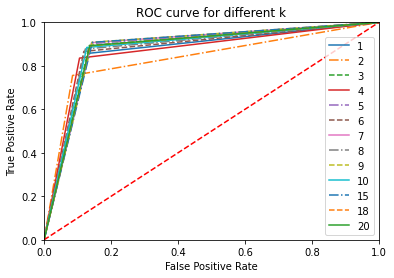

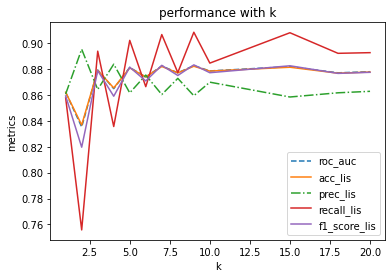

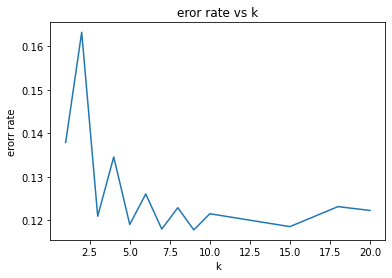

max k 9 roc_auc 0.882661052051567


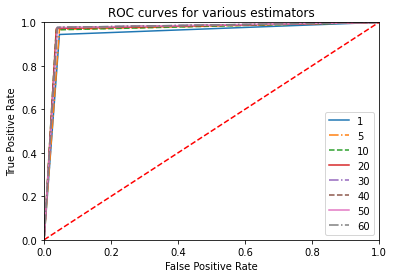

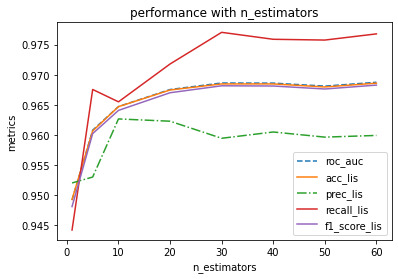

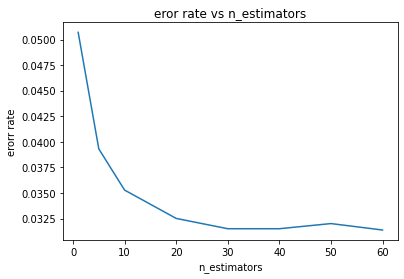

max estimator 60 roc_auc 0.9687605333409335
2
5
10
15
20
25
28
29
30


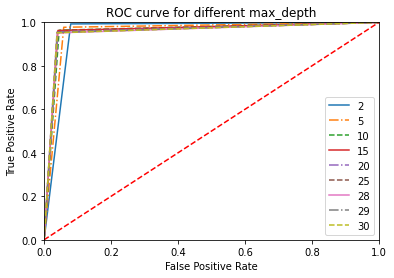

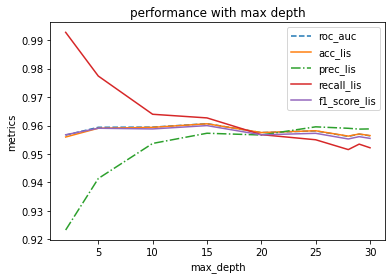

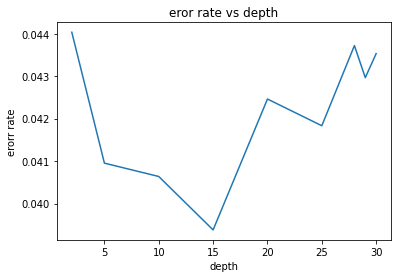

max depth 15 roc_auc 0.9606594797693353


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=0)
max_k = roc_k(X_train, X_test, y_train, y_test)
max_est = roc_est(X_train, X_test, y_train, y_test)
max_depth = roc_dep(X_train, X_test, y_train, y_test)


classifier knn roc_auc 0.8827 Accuracy 0.8822 Precision 0.8594 Recall 0.9085 f-score 0.8833
classifier dc roc_auc 0.9612 Accuracy 0.9611 Precision 0.9573 Recall 0.9637 f-score 0.9605
classifier ensemble roc_auc 0.969 Accuracy 0.9689 Precision 0.9596 Recall 0.9777 f-score 0.9686


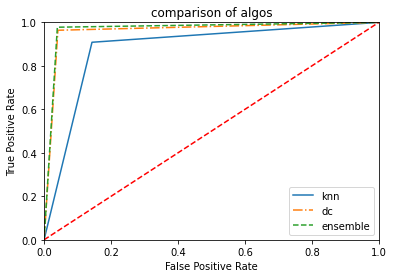

In [33]:
compare(max_k, max_depth,max_est)

results improve with latitude and longitude added, still ensemble performs best

In [34]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['REFERENCE'])
df_new['REFERENCE'] = le.transform(df['REFERENCE'])

le.classes_


array([' ISC', 'BCI', 'BDA', 'BDA/CM', 'CHAN', 'CM/G-R', 'CM/ISS',
       'CM/LEE', 'Dr STGR', 'G-R', 'G-R/BDA', 'G-R/CM', 'G-R/T-S', 'GERI',
       'GSI', 'HRVD', 'IMD', 'ISC', 'ISR', 'ISS', 'ISS/T-S', 'J & S',
       'LEE', 'LEE/CM', 'LEE/T-S', 'MALIK', 'NEIC', 'NEIC / USGS', 'NGRI',
       'OLD', 'PDE', 'PDE/T-S', 'RO', 'SHL', 'T-S', 'T-S/G-R', 'TAN',
       'USGS', nan], dtype=object)

In [35]:
le.fit(df['LOCATION'])
df_new['LOCATION'] = le.transform(df['LOCATION'])

le.classes_


array(['  Myanmar', '  Xizang-India border region', ' Bangladesh', ...,
       'doda, Jammu & Kashmir', 'kachchh, Gujarat', nan], dtype=object)

In [36]:
df_new

,YEAR,MONTH,DATE,MAGNITUDE,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,DEPTH (km),LAT (N),LONG (E),REFERENCE,LOCATION
1,-2474.0,0.0,0.0,1.0,7.5000,0.000000,6.969203,7.260620,7.427072,0.0,71.0,24.00,8,1637
2,-325.0,0.0,0.0,1.0,7.5000,0.000000,6.969203,7.260620,7.427072,0.0,71.0,24.00,8,1637
3,25.0,0.0,0.0,1.0,7.5000,0.000000,6.969203,7.260620,7.427072,0.0,72.9,33.72,8,1637
4,26.0,5.0,10.0,1.0,6.1397,5.737047,5.737047,5.698852,5.999685,0.0,17.3,80.10,26,1637
5,26.0,5.0,10.0,1.0,6.1397,5.737047,5.737047,6.075520,5.999685,80.0,26.0,97.00,9,1011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52985,2019.0,1.0,28.0,0.0,4.0000,5.100000,3.798913,3.242250,3.754460,10.0,32.8,78.40,38,777
52986,2019.0,1.0,28.0,0.0,4.0000,5.100000,3.798913,3.242250,3.754460,70.0,25.5,90.40,38,417
52987,2019.0,1.0,28.0,0.0,4.0000,5.100000,3.798913,3.242250,3.754460,22.0,23.2,86.50,38,442
52988,2019.0,1.0,29.0,0.0,4.0000,5.100000,3.798913,3.242250,3.754460,20.0,32.8,76.40,38,430


In [37]:
y = df_new['MAGNITUDE']
X = df_new[['YEAR ', 'MONTH ', 'DATE', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'DEPTH (km)','LONG (E)','LAT (N)','LOCATION','REFERENCE']]

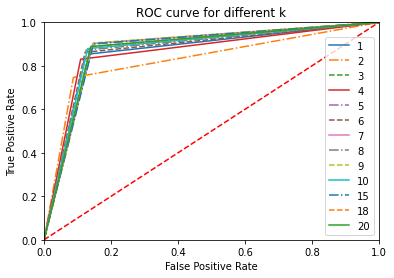

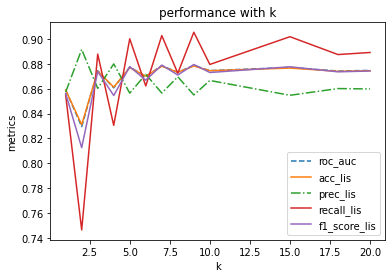

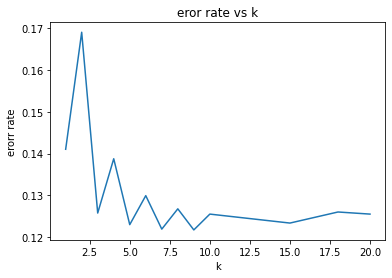

max k 9 roc_auc 0.8787142911429684


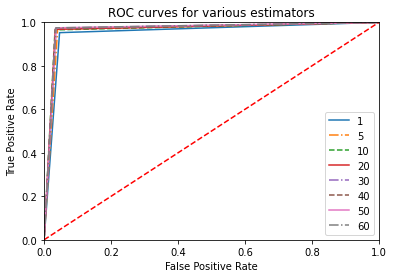

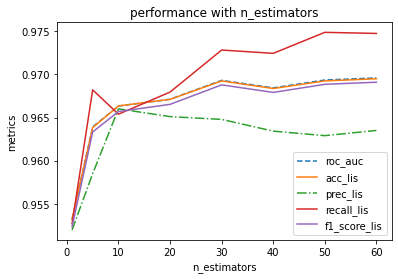

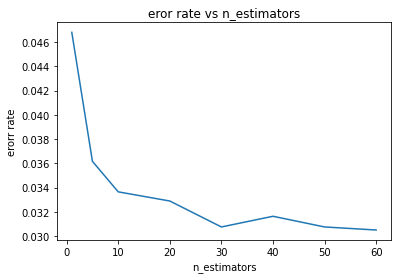

max estimator 60 roc_auc 0.969587430292321
2
5
10
15
20
25
27
27
27


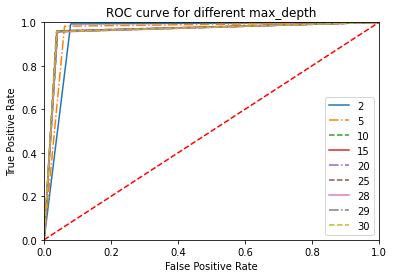

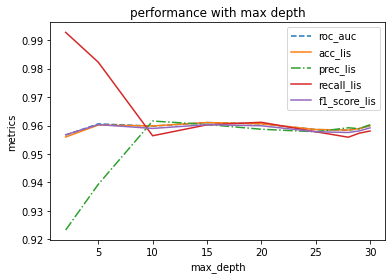

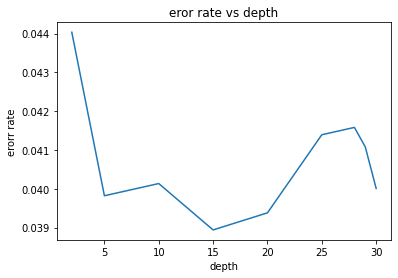

max depth 15 roc_auc 0.9610470639648112


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=0)
max_k = roc_k(X_train, X_test, y_train, y_test)
max_est = roc_est(X_train, X_test, y_train, y_test)
max_depth = roc_dep(X_train, X_test, y_train, y_test)

classifier knn roc_auc 0.8787 Accuracy 0.8782 Precision 0.855 Recall 0.9054 f-score 0.8795
classifier dc roc_auc 0.9613 Accuracy 0.9613 Precision 0.9611 Recall 0.96 f-score 0.9606
classifier ensemble roc_auc 0.9694 Accuracy 0.9693 Precision 0.9635 Recall 0.9744 f-score 0.9689


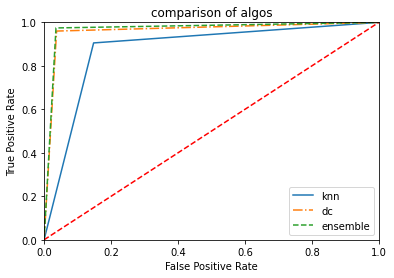

In [39]:
compare(max_k, max_depth,max_est)

by adding more features, roc_auc and Accuracy improves further

## Selecting only 2 features 

In [40]:
from sklearn.feature_selection import SelectFromModel


In [41]:

c = DecisionTreeClassifier(max_depth = max_depth)
c.fit(X_train, y_train)

feature = {}
for name, importance in zip(X_train.columns, c.feature_importances_):
    print(name, importance)
    feature[name] = importance


YEAR  0.027782407911428098
MONTH  0.012621283834032663
DATE 0.018798920441582764
Unnamed: 7 0.853519709971018
Unnamed: 8 0.008066084239100059
Unnamed: 9 0.0035892680954730644
Unnamed: 10 0.004292955232980018
Unnamed: 11 0.00250679411479117
DEPTH (km) 0.004967048648989182
LONG (E) 0.011169538068462792
LAT (N) 0.011970739874963082
LOCATION 0.0003990038238593677
REFERENCE 0.0403162457433197


In [42]:
dic = {k: v for k, v in sorted(feature.items(), key=lambda item: item[1])}

In [43]:
dic

{'LOCATION': 0.0003990038238593677,
 'Unnamed: 11': 0.00250679411479117,
 'Unnamed: 9': 0.0035892680954730644,
 'Unnamed: 10': 0.004292955232980018,
 'DEPTH (km)': 0.004967048648989182,
 'Unnamed: 8': 0.008066084239100059,
 'LONG (E)': 0.011169538068462792,
 'LAT (N)': 0.011970739874963082,
 'MONTH ': 0.012621283834032663,
 'DATE': 0.018798920441582764,
 'YEAR ': 0.027782407911428098,
 'REFERENCE': 0.0403162457433197,
 'Unnamed: 7': 0.853519709971018}

Select Unnamed: 7 and REFERENCE since they are most important features

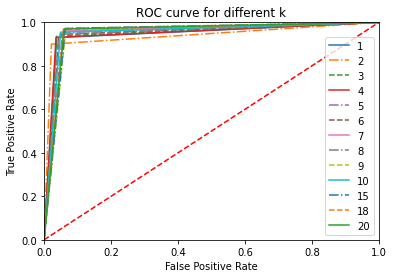

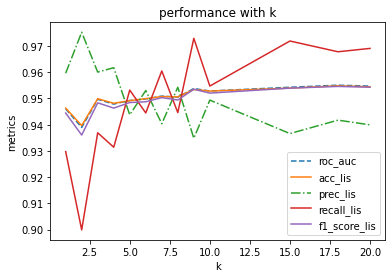

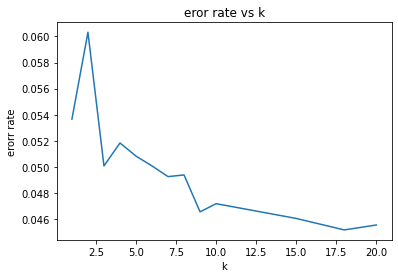

max k 18 roc_auc 0.9550724152345124


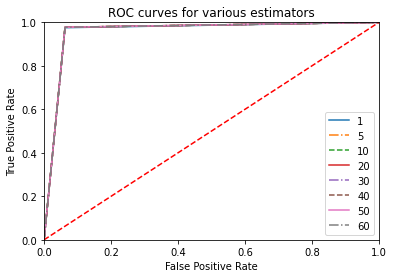

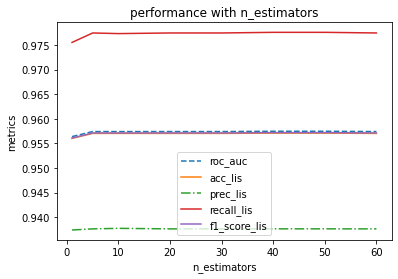

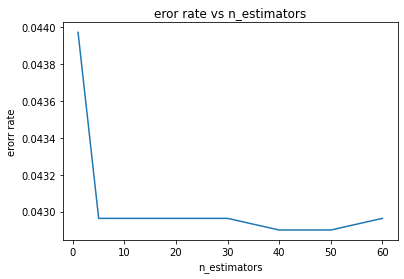

max estimator 40 roc_auc 0.9574741594702693
2
5
10
15
20
25
26
26
26


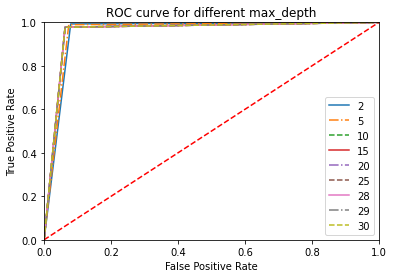

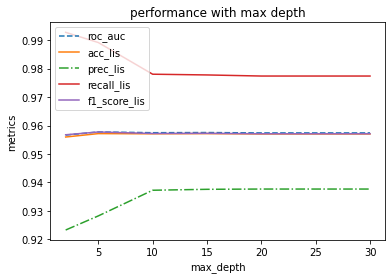

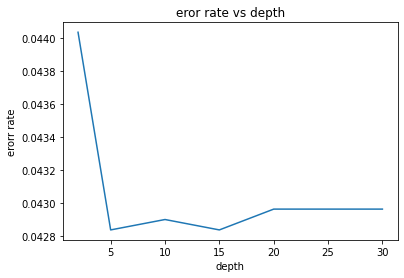

max depth 5 roc_auc 0.957749878872517


In [44]:
y = df_new['MAGNITUDE']
X = df_new[[ 'Unnamed: 7','REFERENCE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=0)
max_k = roc_k(X_train, X_test, y_train, y_test)
max_est = roc_est(X_train, X_test, y_train, y_test)
max_depth = roc_dep(X_train, X_test, y_train, y_test)

classifier knn roc_auc 0.9551 Accuracy 0.9548 Precision 0.9417 Recall 0.9678 f-score 0.9546
classifier dc roc_auc 0.9577 Accuracy 0.9572 Precision 0.9282 Recall 0.9892 f-score 0.9577
classifier ensemble roc_auc 0.9575 Accuracy 0.9571 Precision 0.9377 Recall 0.9776 f-score 0.9572


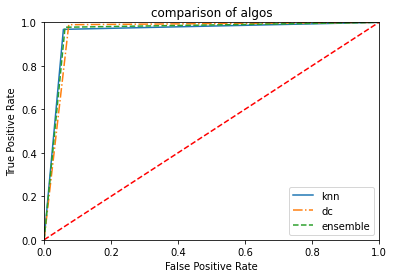

In [45]:
compare(max_k, max_depth,max_est)

Decision tree performs best when only 2 features are selected

# Feature processing

* Making addtional features <br>
<!-- we observe that N, S, E, W directions can be important features if separated out from latitude and longitude -->
Origin time can be divided in time of day and used

In [46]:
df

,Sl. No.,YEAR,MONTH,DATE,ORIGIN TIME,Unnamed: 5,MAGNITUDE,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,LAT (N),LONG (E),DEPTH (km),INTENSITY,Unnamed: 16,Unnamed: 17,LOCATION,REFERENCE
1,1.0,-2474.0,0.0,0.0,NaN,NaN,7.5000,7.5000,NaN,6.969203,7.260620,7.427072,71.0,24.00,0.0,NaN,NaN,NaN,NaN,Dr STGR
2,2.0,-325.0,0.0,0.0,NaN,NaN,7.5000,7.5000,NaN,6.969203,7.260620,7.427072,71.0,24.00,0.0,NaN,NaN,NaN,NaN,Dr STGR
3,3.0,25.0,0.0,0.0,NaN,NaN,7.5000,7.5000,NaN,6.969203,7.260620,7.427072,72.9,33.72,0.0,NaN,NaN,NaN,NaN,Dr STGR
4,4.0,26.0,5.0,10.0,08.19.10.0,NaN,6.1397,6.1397,5.737047,5.737047,5.698852,5.999685,17.3,80.10,NaN,NaN,NaN,NaN,NaN,NEIC
5,5.0,26.0,5.0,10.0,08.19.10.0,NaN,6.1397,6.1397,5.737047,5.737047,6.075520,5.999685,26.0,97.00,80.0,NaN,NaN,NaN,Myanmar,G-R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52985,52970.0,2019.0,NaN,28.0,19:24:08,00:54:08/2019-07-29/,NaN,NaN,NaN,NaN,NaN,NaN,32.8,78.40,10.0,NaN,NaN,NaN,Jammu & Kashmir,NaN
52986,52971.0,2019.0,NaN,28.0,10:44:10,16:14:10,NaN,NaN,NaN,NaN,NaN,NaN,25.5,90.40,70.0,NaN,NaN,NaN,"Distt. East Garo Hills ,Meghalaya",NaN
52987,52972.0,2019.0,NaN,28.0,21:25:06,7/29/2019 2:55,NaN,NaN,NaN,NaN,NaN,NaN,23.2,86.50,22.0,NaN,NaN,NaN,"Distt. Puruliya, West Bengal",NaN
52988,52973.0,2019.0,NaN,29.0,3:33:53,9:03:53,NaN,NaN,NaN,NaN,NaN,NaN,32.8,76.40,20.0,NaN,NaN,NaN,"Distt. Lahaul-Spiti,Himachal Pradesh",NaN


In [47]:
#08.19.10.0
def text_to_num(st):
    if not isinstance(st, str): #replace NaN with 0
        return '00:00:00'
    
    st_ = st.split('.')
    if len(st_)>=4:
#         print(st_)
        return st_[0]+':'+st_[1]+':'+st_[2]
    else:
#         print(st)
        if '.' in st:
            st = st.replace('.',':')
            
        st = st.split(':')
        if len(st)==3:
            return st[0]+':'+st[1]+':'+st[2]
        if len(st)>3:
            return st[0]+':'+st[1]+':'+st[2]
        else:
            if len(st)==2:
                return st[0]+':'+st[1]
            if len(st)==1:
                return st[0]
            else:
                return 0
    
df['ORIGIN TIME2'] = df['ORIGIN TIME'].apply(lambda x: text_to_num(str(x)))

In [48]:
df

,Sl. No.,YEAR,MONTH,DATE,ORIGIN TIME,Unnamed: 5,MAGNITUDE,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,LAT (N),LONG (E),DEPTH (km),INTENSITY,Unnamed: 16,Unnamed: 17,LOCATION,REFERENCE,ORIGIN TIME2
1,1.0,-2474.0,0.0,0.0,NaN,NaN,7.5000,7.5000,NaN,6.969203,...,7.427072,71.0,24.00,0.0,NaN,NaN,NaN,NaN,Dr STGR,nan
2,2.0,-325.0,0.0,0.0,NaN,NaN,7.5000,7.5000,NaN,6.969203,...,7.427072,71.0,24.00,0.0,NaN,NaN,NaN,NaN,Dr STGR,nan
3,3.0,25.0,0.0,0.0,NaN,NaN,7.5000,7.5000,NaN,6.969203,...,7.427072,72.9,33.72,0.0,NaN,NaN,NaN,NaN,Dr STGR,nan
4,4.0,26.0,5.0,10.0,08.19.10.0,NaN,6.1397,6.1397,5.737047,5.737047,...,5.999685,17.3,80.10,NaN,NaN,NaN,NaN,NaN,NEIC,08:19:10
5,5.0,26.0,5.0,10.0,08.19.10.0,NaN,6.1397,6.1397,5.737047,5.737047,...,5.999685,26.0,97.00,80.0,NaN,NaN,NaN,Myanmar,G-R,08:19:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52985,52970.0,2019.0,NaN,28.0,19:24:08,00:54:08/2019-07-29/,NaN,NaN,NaN,NaN,...,NaN,32.8,78.40,10.0,NaN,NaN,NaN,Jammu & Kashmir,NaN,19:24:08
52986,52971.0,2019.0,NaN,28.0,10:44:10,16:14:10,NaN,NaN,NaN,NaN,...,NaN,25.5,90.40,70.0,NaN,NaN,NaN,"Distt. East Garo Hills ,Meghalaya",NaN,10:44:10
52987,52972.0,2019.0,NaN,28.0,21:25:06,7/29/2019 2:55,NaN,NaN,NaN,NaN,...,NaN,23.2,86.50,22.0,NaN,NaN,NaN,"Distt. Puruliya, West Bengal",NaN,21:25:06
52988,52973.0,2019.0,NaN,29.0,3:33:53,9:03:53,NaN,NaN,NaN,NaN,...,NaN,32.8,76.40,20.0,NaN,NaN,NaN,"Distt. Lahaul-Spiti,Himachal Pradesh",NaN,3:33:53


In [49]:
def text_to_num(st):
    if not isinstance(st, str): #replace NaN with 0
        return 0
    if ':' in st and len(st)==8:
        time = int(st.split(':')[0])
        if time > 6 and time < 12: #morning
            return 0 #morning with 0
        elif time >=12 and time < 17: #afternoon
            return 1
        elif time >=17 and time < 20: #evening
            return 2
        else: #night
            return 3
    else: #nan
        return 0

df['time_of_day'] = df['ORIGIN TIME2'].apply(lambda x: text_to_num(str(x)))       
    
        
    

In [50]:
df

,Sl. No.,YEAR,MONTH,DATE,ORIGIN TIME,Unnamed: 5,MAGNITUDE,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,LAT (N),LONG (E),DEPTH (km),INTENSITY,Unnamed: 16,Unnamed: 17,LOCATION,REFERENCE,ORIGIN TIME2,time_of_day
1,1.0,-2474.0,0.0,0.0,NaN,NaN,7.5000,7.5000,NaN,6.969203,...,71.0,24.00,0.0,NaN,NaN,NaN,NaN,Dr STGR,nan,0
2,2.0,-325.0,0.0,0.0,NaN,NaN,7.5000,7.5000,NaN,6.969203,...,71.0,24.00,0.0,NaN,NaN,NaN,NaN,Dr STGR,nan,0
3,3.0,25.0,0.0,0.0,NaN,NaN,7.5000,7.5000,NaN,6.969203,...,72.9,33.72,0.0,NaN,NaN,NaN,NaN,Dr STGR,nan,0
4,4.0,26.0,5.0,10.0,08.19.10.0,NaN,6.1397,6.1397,5.737047,5.737047,...,17.3,80.10,NaN,NaN,NaN,NaN,NaN,NEIC,08:19:10,0
5,5.0,26.0,5.0,10.0,08.19.10.0,NaN,6.1397,6.1397,5.737047,5.737047,...,26.0,97.00,80.0,NaN,NaN,NaN,Myanmar,G-R,08:19:10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52985,52970.0,2019.0,NaN,28.0,19:24:08,00:54:08/2019-07-29/,NaN,NaN,NaN,NaN,...,32.8,78.40,10.0,NaN,NaN,NaN,Jammu & Kashmir,NaN,19:24:08,2
52986,52971.0,2019.0,NaN,28.0,10:44:10,16:14:10,NaN,NaN,NaN,NaN,...,25.5,90.40,70.0,NaN,NaN,NaN,"Distt. East Garo Hills ,Meghalaya",NaN,10:44:10,0
52987,52972.0,2019.0,NaN,28.0,21:25:06,7/29/2019 2:55,NaN,NaN,NaN,NaN,...,23.2,86.50,22.0,NaN,NaN,NaN,"Distt. Puruliya, West Bengal",NaN,21:25:06,3
52988,52973.0,2019.0,NaN,29.0,3:33:53,9:03:53,NaN,NaN,NaN,NaN,...,32.8,76.40,20.0,NaN,NaN,NaN,"Distt. Lahaul-Spiti,Himachal Pradesh",NaN,3:33:53,0


In [51]:
df_new["time_of_day"] = df["time_of_day"]

In [52]:
df_new

,YEAR,MONTH,DATE,MAGNITUDE,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,DEPTH (km),LAT (N),LONG (E),REFERENCE,LOCATION,time_of_day
1,-2474.0,0.0,0.0,1.0,7.5000,0.000000,6.969203,7.260620,7.427072,0.0,71.0,24.00,8,1637,0
2,-325.0,0.0,0.0,1.0,7.5000,0.000000,6.969203,7.260620,7.427072,0.0,71.0,24.00,8,1637,0
3,25.0,0.0,0.0,1.0,7.5000,0.000000,6.969203,7.260620,7.427072,0.0,72.9,33.72,8,1637,0
4,26.0,5.0,10.0,1.0,6.1397,5.737047,5.737047,5.698852,5.999685,0.0,17.3,80.10,26,1637,0
5,26.0,5.0,10.0,1.0,6.1397,5.737047,5.737047,6.075520,5.999685,80.0,26.0,97.00,9,1011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52985,2019.0,1.0,28.0,0.0,4.0000,5.100000,3.798913,3.242250,3.754460,10.0,32.8,78.40,38,777,2
52986,2019.0,1.0,28.0,0.0,4.0000,5.100000,3.798913,3.242250,3.754460,70.0,25.5,90.40,38,417,0
52987,2019.0,1.0,28.0,0.0,4.0000,5.100000,3.798913,3.242250,3.754460,22.0,23.2,86.50,38,442,3
52988,2019.0,1.0,29.0,0.0,4.0000,5.100000,3.798913,3.242250,3.754460,20.0,32.8,76.40,38,430,0


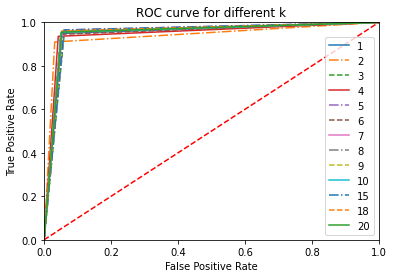

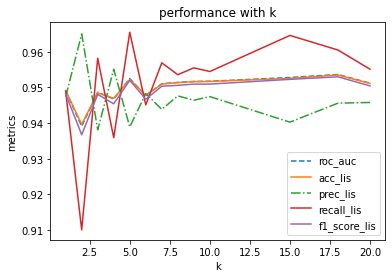

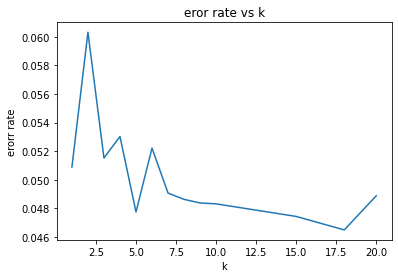

max k 18 roc_auc 0.9536416146531004


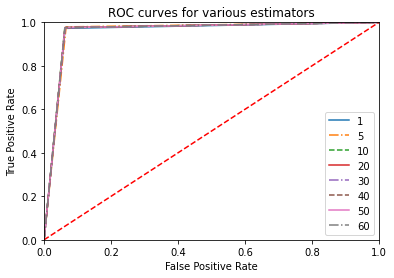

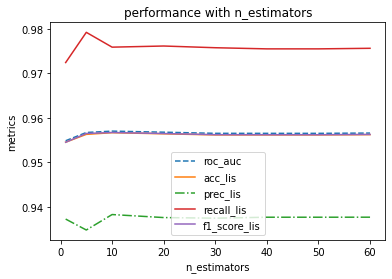

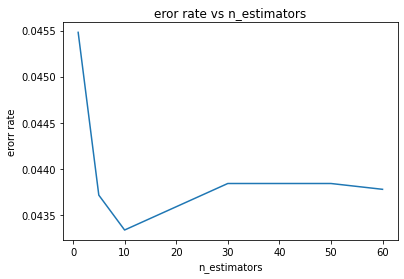

max estimator 10 roc_auc 0.9570113337323415
2
5
10
15
20
25
28
29
30


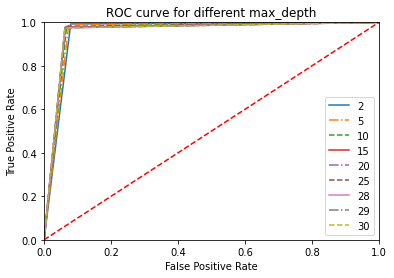

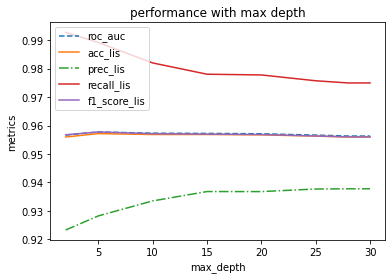

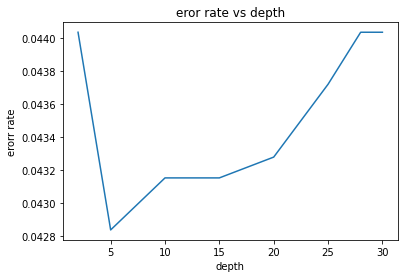

max depth 5 roc_auc 0.957749878872517


In [53]:
y = df_new['MAGNITUDE']
X = df_new[[ 'Unnamed: 7','REFERENCE','time_of_day']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=0)
max_k = roc_k(X_train, X_test, y_train, y_test)
max_est = roc_est(X_train, X_test, y_train, y_test)
max_depth = roc_dep(X_train, X_test, y_train, y_test)

classifier knn roc_auc 0.9536 Accuracy 0.9535 Precision 0.9456 Recall 0.9605 f-score 0.953
classifier dc roc_auc 0.9577 Accuracy 0.9572 Precision 0.9282 Recall 0.9892 f-score 0.9577
classifier ensemble roc_auc 0.957 Accuracy 0.9567 Precision 0.9373 Recall 0.9771 f-score 0.9568


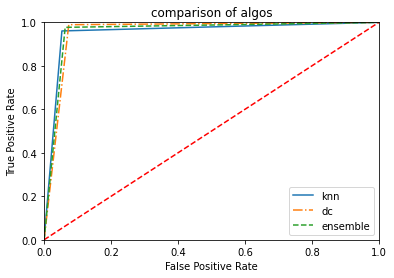

In [54]:
compare(max_k, max_depth,max_est)

roc decreased by addtion of our extra feature which was time of day divided in four parts: morning, afternoon, evening, night